In [1]:
import tensorflow as tf
import pickle 
from sklearn.preprocessing import StandardScaler

file1 = open('X_beam.pkl', 'rb')
file2 = open('Y_beam_2.pkl', 'rb')
X1=pickle.load(file1)
file1.close()
Y=pickle.load(file2)
file2.close()
# Scale targets
Y1=Y[:480,:]
N, L, D = Y1.shape
Y_flat = Y1.reshape(-1, D)
scaler = StandardScaler().fit(Y_flat)
Y1 = scaler.transform(Y_flat).reshape(N, L, D)
X=X1[:480,:]

2025-07-08 17:36:21.754039: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-08 17:36:21.785331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751992581.808525 3638836 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751992581.821201 3638836 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751992581.854349 3638836 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
model=tf.keras.models.load_model('saved_model_2.keras')

2025-07-08 17:33:52.650312: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [74]:
X1[480,:].shape

(231, 4)

In [4]:
from timeit import default_timer as timer

start = timer()
# r1=model(X1[480:,:])
# final=scaler.inverse_transform(tf.reshape(r1,(-1,20)))
r1=model(tf.expand_dims(X1[13], axis=0))
final=scaler.inverse_transform(tf.reshape(r1,(-1,20)))
end = timer()
print(end - start)

2.0550693701952696


In [5]:
file2 = open('Y_beam_2.pkl', 'rb')
Y2=pickle.load(file2)

In [6]:
real=Y2[480:,:]

In [9]:
import numpy as np
node=np.load('Test_Node.npy')
np.max(real[0,:,1])

0.05047563743232943

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
# r2_score(Y1[4900:,:], final.numpy())
r2_score(real.reshape(-1, D), final)
root_mean_squared_error(real.reshape(-1, D), final)

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (/home/pgrad2/2670035g/anaconda3/envs/gnnEmulEnv/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

In [75]:
res=final.reshape(-1,L,D)

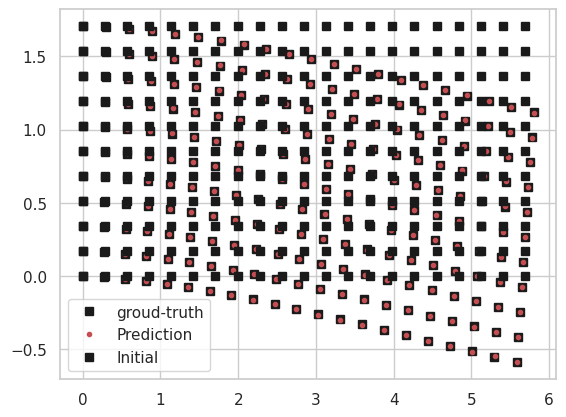

In [56]:
import matplotlib.pyplot as plt
plt.plot(node[4,:,0]+Y[4,:,4], node[4,:,1]+Y[4,:,14], 'ks' ,label='groud-truth')
plt.plot(node[4,:,0]+res[0,:,4], node[4,:,1]+res[0,:,14], 'ro' ,markersize=3,label='Prediction')
plt.plot(node[4,:,0], node[4,:,1], 'ks' ,label='Initial')
plt.legend()

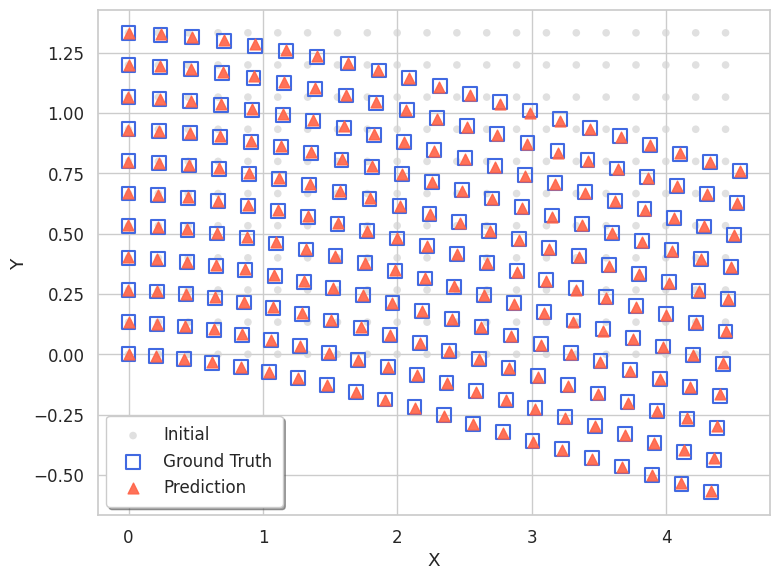

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 设定风格
sns.set(style="whitegrid", font_scale=1.1)  # 白底网格，稍大字号

# 2. 新建画布
fig, ax = plt.subplots(figsize=(8, 6))

# 3. 绘制三类点
# 3.1 初始节点（浅灰小圆点）
ax.scatter(
    node[13, :, 0], node[13, :, 1],
    s=30,                      # 点大小
    c="lightgrey",             # 填充色
    marker="o",                # 圆点
    edgecolors="none",         # 无边缘
    alpha=0.7,                 # 透明度
    label="Initial"
)

# 3.2 Ground-truth （蓝色空心方块）
ax.scatter(
    node[13, :, 0] + Y[13, :, 4],
    node[13, :, 1] + Y[13, :, 14],
    s=100,
    facecolors="none",         # 空心
    edgecolors="royalblue",    # 边缘色
    linewidth=1.5,
    marker="s",                # 方块
    label="Ground Truth"
)

# 3.3 Prediction （红色实心三角）
ax.scatter(
    node[13, :, 0] + res[0, :, 4],
    node[13, :, 1] + res[0, :, 14],
    s=60,
    c="tomato",
    marker="^",                # 上三角
    alpha=0.9,
    label="Prediction"
)

# 4. 坐标轴、标题、图例
# ax.set_title("Node Positions: Initial vs. Ground Truth vs. Prediction", pad=12)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend(
    # loc="upper right",
    frameon=True,
    fancybox=True,
    shadow=True,
    borderpad=0.6
)

# 5. 等比例显示、去掉右上脊梁
# ax.set_aspect("equal", "box")
# sns.despine(trim=True)

plt.tight_layout()
plt.show()


In [98]:
import pickle 
file1 = open('Result/Samples1_paras.pkl', 'rb')
file2 = open('Result/Samples2_paras.pkl', 'rb')
file3 = open('Result/Samples1_para.pkl', 'rb')
file4 = open('Result/Samples2_para.pkl', 'rb')
S1=pickle.load(file1)
# file1.close()
S2=pickle.load(file2)
# file2.close()
S3=pickle.load(file3)
S4=pickle.load(file4)

(4.0, 10.5)

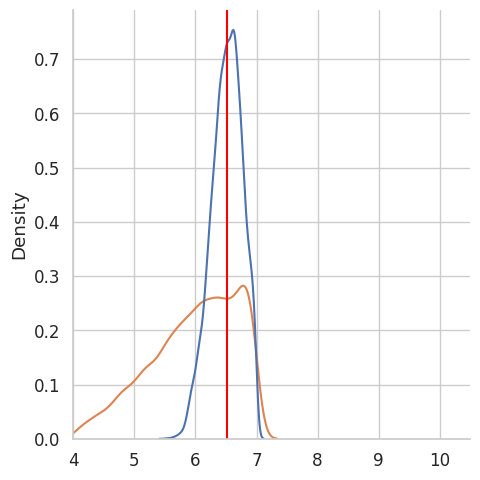

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

p=sns.displot([S1[:,0],S3[:,0]],kind="kde",legend=False)
plt.axvline(X1[480,0,2],color='red')
plt.xlim(4,10.5)

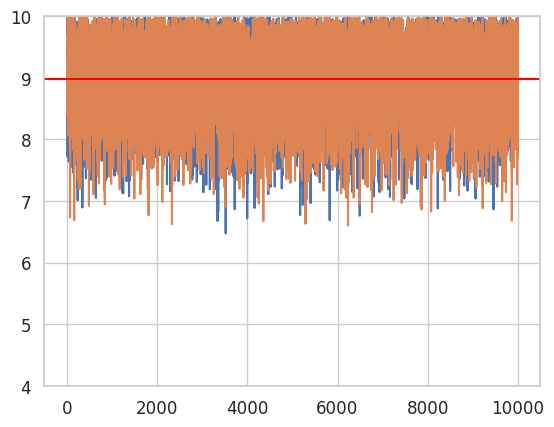

In [105]:
plt.plot(range(10000),np.array(S3[:,1]).reshape(10000))
plt.plot(range(10000),np.array(S4[:,1]).reshape(10000))
plt.ylim(4,10)
plt.axhline(X1[480,0,3],color='red')

In [271]:
a = X1[480,:,:2]
b=S3
a_exp = np.tile(a[np.newaxis, :, :], (10000, 1, 1))
b_exp = np.tile(b[:, np.newaxis, :], (1, 231, 1))
# 最后在最后一维拼接
c2= np.concatenate([a_exp, b_exp], axis=-1)  

In [264]:
truth=Y[480].reshape(-1,2,10)

In [266]:
r1=model(c1)
final=scaler.inverse_transform(tf.reshape(r1,(-1,20)))
final=final.reshape(-1, L, D)
data=final[:,20,:].reshape(-1,2,10)


In [272]:
r2=model(c2)
final2=scaler.inverse_transform(tf.reshape(r2,(-1,20)))
final2=final2.reshape(-1, L, D)
data2=final2[:,20,:].reshape(-1,2,10)

In [273]:
np.std(data2,axis=(0,1))

array([0.0591568 , 0.11671346, 0.17653776, 0.23312159, 0.29255746,
       0.35193796, 0.41263665, 0.47414217, 0.52950894, 0.59191822])

In [274]:
np.std(data,axis=(0,1))

array([0.05512719, 0.11015016, 0.16557463, 0.22008853, 0.2749151 ,
       0.32906378, 0.38747132, 0.44252317, 0.4974279 , 0.5517776 ])

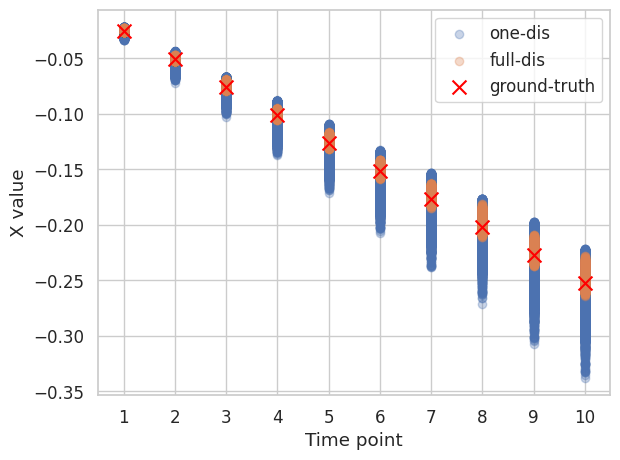

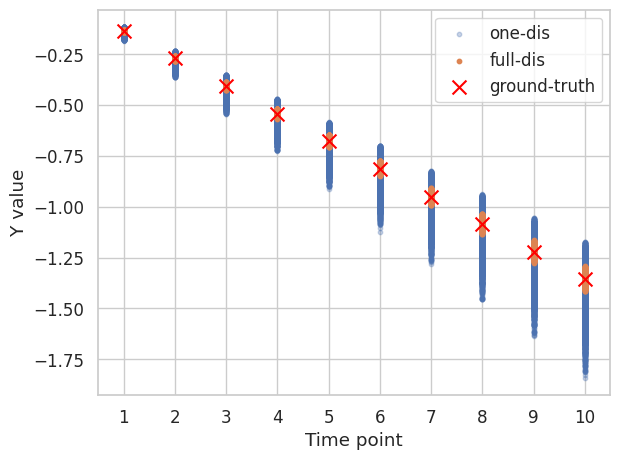

In [279]:

import numpy as np
import matplotlib.pyplot as plt

# 假设 data.full.shape == (10000, 2, 10)
# 假设 data.one .shape == (10000, 2, 10)

times = np.arange(1, data.shape[2] + 1)   # [1,2,...,10]

# Flatten
x_vals  = data[:, 0, :].flatten(order='F')
y_vals  = data[:, 1, :].flatten(order='F')
x2_vals = data2[:, 0, :].flatten(order='F')
y2_vals = data2[:, 1, :].flatten(order='F')
t_coords = np.repeat(times, data.shape[0])

# ——— X 分布 ———
plt.figure()
plt.scatter(t_coords, x2_vals,alpha=0.3, label='one-dis')
plt.scatter(t_coords, x_vals, alpha=0.3, label='full-dis')
plt.scatter(times, truth[20, 0, :], marker='x', s=100, color='red',label='ground-truth')
# plt.title('X coordinates over time')
plt.xlabel('Time point')
plt.ylabel('X value')
plt.xticks(times)
plt.xlim(times.min() - 0.5, times.max() + 0.5)
plt.legend(loc='upper right')   # 显示图例
plt.tight_layout()
plt.show()

# ——— Y 分布 ———
plt.figure()
plt.scatter(t_coords, y2_vals, alpha=0.3, s=10, label='one-dis')
plt.scatter(t_coords, y_vals,  alpha=1, s=10, label='full-dis')
plt.scatter(times, truth[20, 1, :], marker='x', s=100, color='red',label='ground-truth')
# plt.title('Y coordinates over time')
plt.xlabel('Time point')
plt.ylabel('Y value')
plt.xticks(times)
plt.xlim(times.min() - 0.5, times.max() + 0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
